In [1]:
using Revise
using SurfaceRegistration
using PyPlot
using ForwardDiff

In [2]:
figurefolder = "same-orbit4/"

p = rand(2)

f(x) = [x[1], x[2], x[1]^2-x[2]^2]
a1 = af(f)
q1, Dq1 = Qmap(f)


angle(x) = π / 2 * sin(π*x[1]) * sin(π*x[2])
h(x) = [
    (x[1]-0.5)*cos(angle(x)) - (x[2]-0.5) * sin(angle(x)) + 0.5,
    (x[1]-0.5)*sin(angle(x)) + (x[2]-0.5) * cos(angle(x)) + 0.5]
g = f ∘ h
a2 = af(g)

q2, Dq2 = Qmap(g)

(SurfaceRegistration.var"#q#119"{Base.var"#64#65"{typeof(f),typeof(h)},SurfaceRegistration.var"#101#102"{SurfaceRegistration.var"#fx#115"{Base.var"#64#65"{typeof(f),typeof(h)}},SurfaceRegistration.var"#fy#117"{Base.var"#64#65"{typeof(f),typeof(h)}}}}(Base.var"#64#65"{typeof(f),typeof(h)}(f, h), SurfaceRegistration.var"#101#102"{SurfaceRegistration.var"#fx#115"{Base.var"#64#65"{typeof(f),typeof(h)}},SurfaceRegistration.var"#fy#117"{Base.var"#64#65"{typeof(f),typeof(h)}}}(SurfaceRegistration.var"#fx#115"{Base.var"#64#65"{typeof(f),typeof(h)}}(Base.var"#64#65"{typeof(f),typeof(h)}(f, h)), SurfaceRegistration.var"#fy#117"{Base.var"#64#65"{typeof(f),typeof(h)}}(Base.var"#64#65"{typeof(f),typeof(h)}(f, h)))), SurfaceRegistration.var"#Dq#120"{SurfaceRegistration.var"#q#119"{Base.var"#64#65"{typeof(f),typeof(h)},SurfaceRegistration.var"#101#102"{SurfaceRegistration.var"#fx#115"{Base.var"#64#65"{typeof(f),typeof(h)}},SurfaceRegistration.var"#fy#117"{Base.var"#64#65"{typeof(f),typeof(h)}}}}}(Sur

In [5]:
#### Plot Once to Fix PyPlot Projection Bug

figure(figsize=(0.1, 0.1))
plot_surface([0. 0.], [0. 0], [0. 0]);
show()

In [4]:
g(p)

3-element Array{Float64,1}:
 0.5250605875205356
 0.1696890532022992
 0.24689424579071734

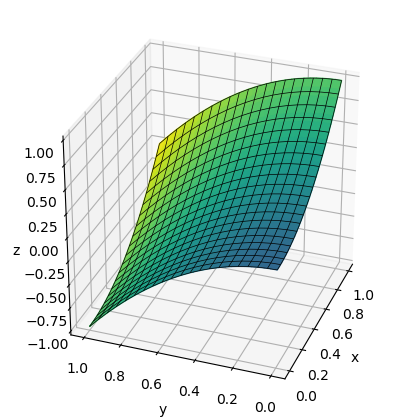

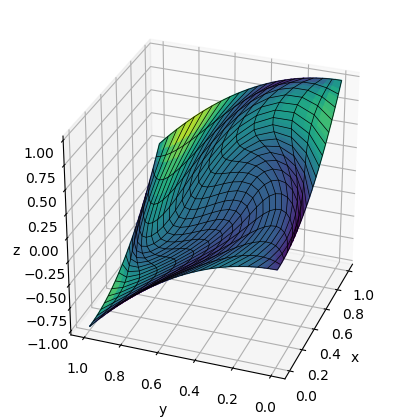

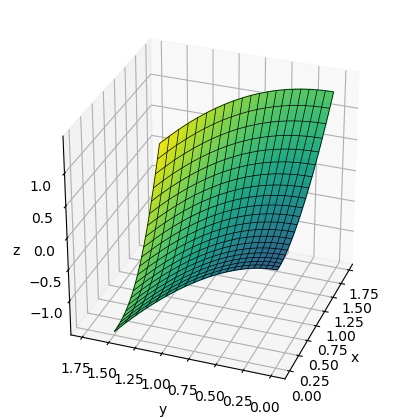

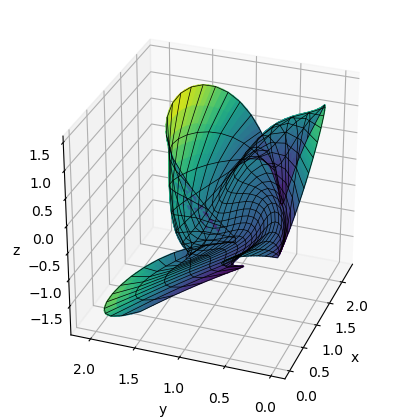

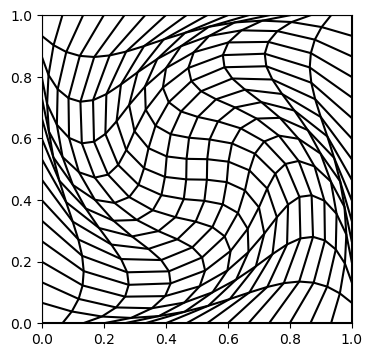

In [26]:
# Figure Regular 
fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(f, n_points=31, axis=ax, colorfunc=a1, shade=false)
plot_parametric_wireframe(f, n_points=21, axis=ax, color="k", lw=0.5)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
ax.view_init(30, 200)
plt.savefig(figurefolder * "regular-surface.pdf")

# Figure Warped
fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(g, n_points=31, axis=ax, colorfunc=a2, shade=false)
plot_parametric_wireframe(g, n_points=21, axis=ax, color="k", lw=0.5)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
ax.view_init(30, 200)
plt.savefig(figurefolder * "warped-surface.pdf")

# Qmap Regular 
fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(q1, n_points=31, axis=ax, colorfunc=a1, shade=false)
plot_parametric_wireframe(q1, n_points=21, axis=ax, color="k", lw=0.5)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
ax.view_init(30, 200)
plt.savefig(figurefolder * "regular-qmap.pdf")

# Qmap Warped
fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(q2, n_points=51, axis=ax, colorfunc=a2, shade=false)
plot_parametric_wireframe(q2,n_points=21, axis=ax, color="k", lw=0.5)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
ax.view_init(30, 200)
plt.savefig(figurefolder * "warped-qmap.pdf")

# Underlying Diffeomorphism
fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plot_diffeomorphism(h, axis=ax)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.savefig(figurefolder * "base-diffeomorphsim.pdf")
show()

In [18]:
B1, DB1, divB1 = construct_basis(1);
R, DR, Γ, errors = SurfaceRegistrationAlgorithm(q2, q1, Dq1, B1, DB1, divB1,
    max_iter=10, error_change_tol=1e-10, 
    armijo_constant=0.5, armijo_scaling=0.9, armijo_max_iter=100,
    verbose=true
)

[SurfaceRegistration] Iter 0	Error=0.49841136093101207
[SurfaceRegristration] Gradient Norm:6.195463514811739
------------------------------------------------------------
[Armijo] Iter 0:	 0.30274460985274015 	 0.321649042244993
[Armijo] Step Size: 	 0.05706185445638615
------------------------------------------------------------
[SurfaceRegistration] Iter 1	Error=0.30274460985274015
[SurfaceRegristration] Gradient Norm:6.832159682106835
------------------------------------------------------------
[Armijo] Iter 0:	 0.3486106622882435 	 0.13724637331602918
[Armijo] Iter 1: 	 0.3289688039037486 	 0.15379619696970026
[Armijo] Iter 2: 	 0.3132671562359827 	 0.16869103825800424
[Armijo] Iter 3: 	 0.300816799435838 	 0.18209639541747785
[Armijo] Iter 4: 	 0.29114435717119536 	 0.19416121686100407
[Armijo] Iter 5: 	 0.2838511404168886 	 0.2050195561601777
[Armijo] Iter 6: 	 0.2785737284016423 	 0.21479206152943392
[Armijo] Iter 7: 	 0.27497543585903084 	 0.22358731636176454
[Armijo] Iter 8: 	

[Armijo] Iter 16: 	 0.2794372013949898 	 0.2517964814643558
[Armijo] Iter 17: 	 0.2777723741410942 	 0.2536324383955346
[Armijo] Iter 18: 	 0.2763962490327953 	 0.2552847996335955
[Armijo] Iter 19: 	 0.27526148441442505 	 0.2567719247478504
[Armijo] Iter 20: 	 0.274327738908402 	 0.25811033735067973
[Armijo] Iter 21: 	 0.2735608542783164 	 0.2593149086932261
[Armijo] Iter 22: 	 0.2729320684458983 	 0.2603990229015179
[Armijo] Iter 23: 	 0.27241728054633974 	 0.2613747256889805
[Armijo] Iter 24: 	 0.27199638098611534 	 0.26225285819769684
[Armijo] Iter 25: 	 0.27165265229401314 	 0.2630431774555415
[Armijo] Iter 26: 	 0.2713722415303937 	 0.2637544647876018
[Armijo] Iter 27: 	 0.271143701532059 	 0.264394623386456
[Armijo] Iter 28: 	 0.27095759616900206 	 0.26497076612542475
[Armijo] Iter 29: 	 0.27080616359823595 	 0.2654892945904967
[Armijo] Iter 30: 	 0.2706830310694031 	 0.26595597020906137
[Armijo] Iter 31: 	 0.27058297485515864 	 0.26637597826576964
[Armijo] Iter 32: 	 0.270501719

[Armijo] Iter 72: 	 0.27015604584397457 	 0.2701057515808618
[Armijo] Iter 73: 	 0.2701560324618637 	 0.27011077475850054
[Armijo] Iter 74: 	 0.2701560217729735 	 0.2701152956183754
[Armijo] Iter 75: 	 0.27015601325062166 	 0.27011936439226275
[Armijo] Iter 76: 	 0.27015600646966736 	 0.2701230262887614
[Armijo] Iter 77: 	 0.27015600108707566 	 0.27012632199561015
[Armijo] Iter 78: 	 0.2701559968267567 	 0.270129288131774
[Armijo] Iter 79: 	 0.27015599346458624 	 0.2701319576543215
[Armijo] Iter 80: 	 0.2701559908214739 	 0.2701343602246143
[Armijo] Iter 81: 	 0.2701559887527885 	 0.27013652253787773
[Armijo] Iter 82: 	 0.2701559871422062 	 0.2701384686198149
[Armijo] Iter 83: 	 0.27015598589613365 	 0.27014022009355826
[Armijo] Iter 84: 	 0.2701559849394953 	 0.27014179641992736
[Armijo] Iter 85: 	 0.2701559842120333 	 0.2701432151136595
[Armijo] Iter 86: 	 0.2701559836654651 	 0.2701444919380185
[Armijo] Iter 87: 	 0.2701559832611553 	 0.2701456410799415
[Armijo] Iter 88: 	 0.2701559

(Function[SurfaceRegistration.var"#q#119"{typeof(f),SurfaceRegistration.var"#101#102"{SurfaceRegistration.var"#fx#115"{typeof(f)},SurfaceRegistration.var"#fy#117"{typeof(f)}}}(f, SurfaceRegistration.var"#101#102"{SurfaceRegistration.var"#fx#115"{typeof(f)},SurfaceRegistration.var"#fy#117"{typeof(f)}}(SurfaceRegistration.var"#fx#115"{typeof(f)}(f), SurfaceRegistration.var"#fy#117"{typeof(f)}(f))), SurfaceRegistration.var"#ϕr#149"{SurfaceRegistration.var"#q#119"{typeof(f),SurfaceRegistration.var"#101#102"{SurfaceRegistration.var"#fx#115"{typeof(f)},SurfaceRegistration.var"#fy#117"{typeof(f)}}},SurfaceRegistration.var"#γ#147"{SurfaceRegistration.var"#vectorfield#49"{Array{Function,1},Array{Float64,1}}},SurfaceRegistration.var"#J#51"{SurfaceRegistration.var"#Dγ#148"{SurfaceRegistration.var"#jacobian_matrix#50"{Array{Function,1},Array{Float64,1}}}}}(SurfaceRegistration.var"#q#119"{typeof(f),SurfaceRegistration.var"#101#102"{SurfaceRegistration.var"#fx#115"{typeof(f)},SurfaceRegistration.var

In [19]:
# Construct Composed Diffeomorphism
ψ = ∘(Γ...)
a_rw = af(f∘ψ)

#105 (generic function with 1 method)

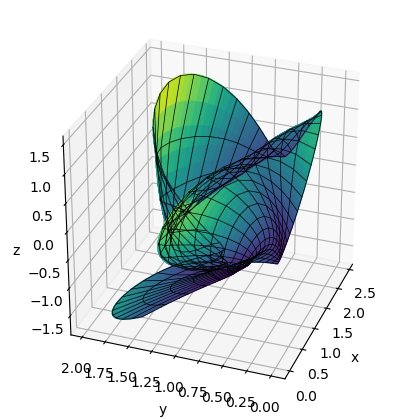

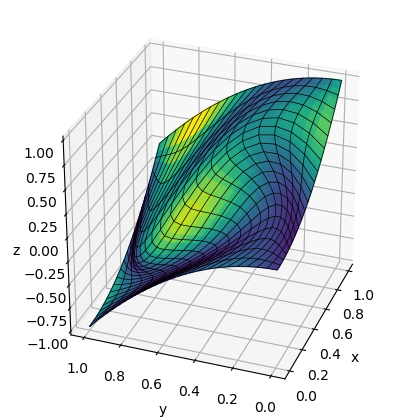

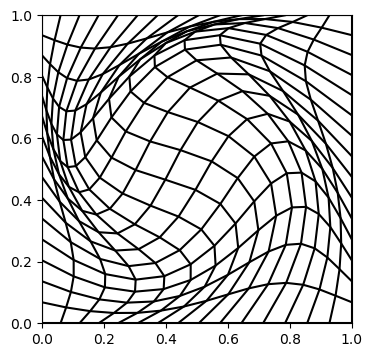

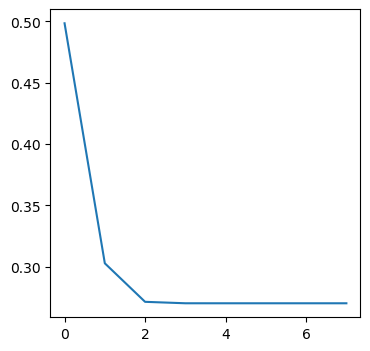

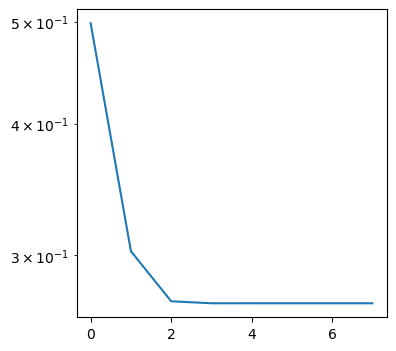

In [29]:
# Ending Q-map
fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(R[length(R)], n_points=51, axis=ax, colorfunc=a_rw, shade=false)
plot_parametric_wireframe(R[length(R)], n_points=21, axis=ax, color="k", lw=0.5)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
ax.view_init(30, 200)
plt.savefig(figurefolder * "regular-warped-matched-qmap.pdf")

# Reconstructed Surface
fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(f∘ψ, n_points=31, axis=ax, colorfunc=a_rw, rel_colorfunc=a2, shade=false)
plot_parametric_wireframe(f∘ψ, n_points=21, axis=ax, color="k", lw=0.5)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
ax.view_init(30, 200)
plt.savefig(figurefolder * "regular-warped-matched-surface.pdf")


# Total Diffeomorphism
fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plot_diffeomorphism(ψ, axis=ax)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.savefig(figurefolder * "regular-warped-diffeomorphsim.pdf")
show()


# Linear Error
fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.plot(errors)
plt.savefig(figurefolder * "regular-warped-error-linear.pdf")
show()


# Semilog Error
fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.semilogy(errors)
plt.savefig(figurefolder * "regular-warped-error-semilogy.pdf")
show()